# Simulate phylogeny-resolved scRNA-seq data using PhyloVelo

## import necessary packages

In [1]:
import phylovelo as pv
import numpy as np
import matplotlib.pyplot as plt
import os

/home/wangkun/miniconda3/lib/python3.9/site-packages/phylovelo/sim_utils.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Assign reaction type and rate to simulate linear model
0 -> 1 -> 2 -> 3 -> 4

In [7]:
num_elements = 5
system = pv.sim_utils.Gillespie(
    num_elements,
    inits=[1, 0, 0, 0, 0],
    max_cell_num=8000
)

p0 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 17))))
p1 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 17))))
p2 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 17))))
p3 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 18))))
p4 = lambda t: (1 - 1 / (1 + np.exp(-0.6 * (t - 19))))
d0 = lambda t: 1 - p0(t)
d1 = lambda t: 1 - p1(t)
d2 = lambda t: 1 - p2(t)
d3 = lambda t: 1 - p3(t)

system.add_reaction(p0, [1, 0, 0, 0, 0], [2, 0, 0, 0, 0], index=0) # 0 self renew
system.add_reaction(p1, [0, 1, 0, 0, 0], [0, 2, 0, 0, 0], index=1) # 1 self renew
system.add_reaction(p2, [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], index=2) # 2 self renew
system.add_reaction(p3, [0, 0, 0, 1, 0], [0, 0, 0, 2, 0], index=3) # 3 self renew
system.add_reaction(p4, [0, 0, 0, 0, 1], [0, 0, 0, 0, 2], index=4) # 4 self renew
system.add_reaction(d0, [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], index=5) # 0 -> 1 differentiation
system.add_reaction(d1, [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], index=6) # 1 -> 2 differentiation
system.add_reaction(d2, [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], index=7) # 2 -> 3 differentiation
system.add_reaction(d3, [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], index=8) # 3 -> 4 differentiation


system.evolute(20000000)


 maximum cell number reached



## Assign reaction type and rate to simulate bifurcated model

In [ ]:
num_elements = 5
system = Gillespie(
    num_elements,
    inits=[1, 0, 0, 0, 0],
    expr=GE,
    max_cell_num=8000,
)

r0, r1 = 1, 1
p0 = lambda t: r0 * (1 - 1 / (1 + np.exp(-0.5 * (t - 19))))
p1 = lambda t: r1 * (1 - 1 / (1 + np.exp(-0.6 * (t - 18))))
p2 = lambda t: 1
d00 = lambda t: 0.7 * r0 * (1 / (1 + np.exp(-0.5 * (t - 16))))
d01 = lambda t: 0.3 * r0 * (1 / (1 + np.exp(-0.5 * (t - 16))))
d10 = lambda t: 0.6 * r1 * (1 / (1 + np.exp(-0.6 * (t - 16))))
d11 = lambda t: 0.4 * r1 * (1 / (1 + np.exp(-0.6 * (t - 16))))


system.add_reaction(p0, [1, 0, 0, 0, 0], [2, 0, 0, 0, 0], index=0)
system.add_reaction(p1, [0, 1, 0, 0, 0], [0, 2, 0, 0, 0], index=1)
system.add_reaction(p1, [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], index=2)
system.add_reaction(p2, [0, 0, 0, 1, 0], [0, 0, 0, 2, 0], index=3)
system.add_reaction(p2, [0, 0, 0, 0, 1], [0, 0, 0, 0, 2], index=4)
system.add_reaction(d00, [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], index=5)
system.add_reaction(d01, [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], index=6)
system.add_reaction(d10, [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], index=7)
system.add_reaction(d11, [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], index=8)

## Assign reaction type and rate to simulate convergent model

In [ ]:
num_elements = 6

system = Gillespie(
    num_elements,
    inits=[1, 0, 0, 0, 0, 0],
    max_cell_num=6000,
)


r0 = 1

p0 = lambda t: r0 * (1 - 1 / (1 + np.exp(-0.6 * (t - 17.7))))
p12 = lambda t: r0 * (1 - 1 / (1 + np.exp(-0.6 * (t - 16))))
p34 = lambda t: r0 * (1 - 1 / (1 + np.exp(-0.6 * (t - 16))))
p5 = lambda t: r0 * (1 - 1 / (1 + np.exp(-0.6 * (t - 16))))

d0 = lambda t: 1 - p0(t)
d12 = lambda t: 1 - p12(t)
d34 = lambda t: 1 - p34(t)

system.add_reaction(p0, [1, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0], index=0)
system.add_reaction(p12, [0, 1, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0], index=1)
system.add_reaction(p12, [0, 0, 1, 0, 0, 0], [0, 0, 2, 0, 0, 0], index=2)
system.add_reaction(p34, [0, 0, 0, 1, 0, 0], [0, 0, 0, 2, 0, 0], index=3)
system.add_reaction(p34, [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 2, 0], index=4)
system.add_reaction(p5, [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 2], index=5)

system.add_reaction(d0, [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], index=6)
system.add_reaction(d0, [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], index=7)
system.add_reaction(d12, [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], index=8)
system.add_reaction(d12, [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0], index=9)
system.add_reaction(d34, [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1], index=10)
system.add_reaction(d34, [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], index=11)

system.evolute(20000000)

## Write simulation results to file

In [15]:
data_path = "./"
tree_file_name = "tree_origin_linear.csv0"
cell_num_file_name = "cell_num_linear.csv0"

curr_cells = []
t = np.array(system.generation_time)
cell_num_traj = np.array(system.n)

for i in system.curr_cells.values():
    curr_cells += i
while tree_file_name in os.listdir(data_path):
    tree_file_name = tree_file_name[:-1] + str(int(tree_file_name[-1]) + 1)
    cell_num_file_name = cell_num_file_name[:-1] + str(int(cell_num_file_name[-1]) + 1)

np.savetxt(
    data_path + cell_num_file_name,
    np.hstack((t.reshape(-1, 1), cell_num_traj)),
    fmt="%.5f",
)

pv.sim_utils.wirte_lineage_info(
    data_path + tree_file_name, system.anc_cells, curr_cells, system.t[-1]
)


## Reconstruct newick tree

In [17]:
pv.sim_utils.reconstruct('./tree_origin_linear.csv0', output='./tree_origin_linear.nwk', num=1000, is_balance=True)

## Plot lineage tree

In [3]:
tree, color = pv.ana_utils.loadtree('./tree_origin_linear.nwk')

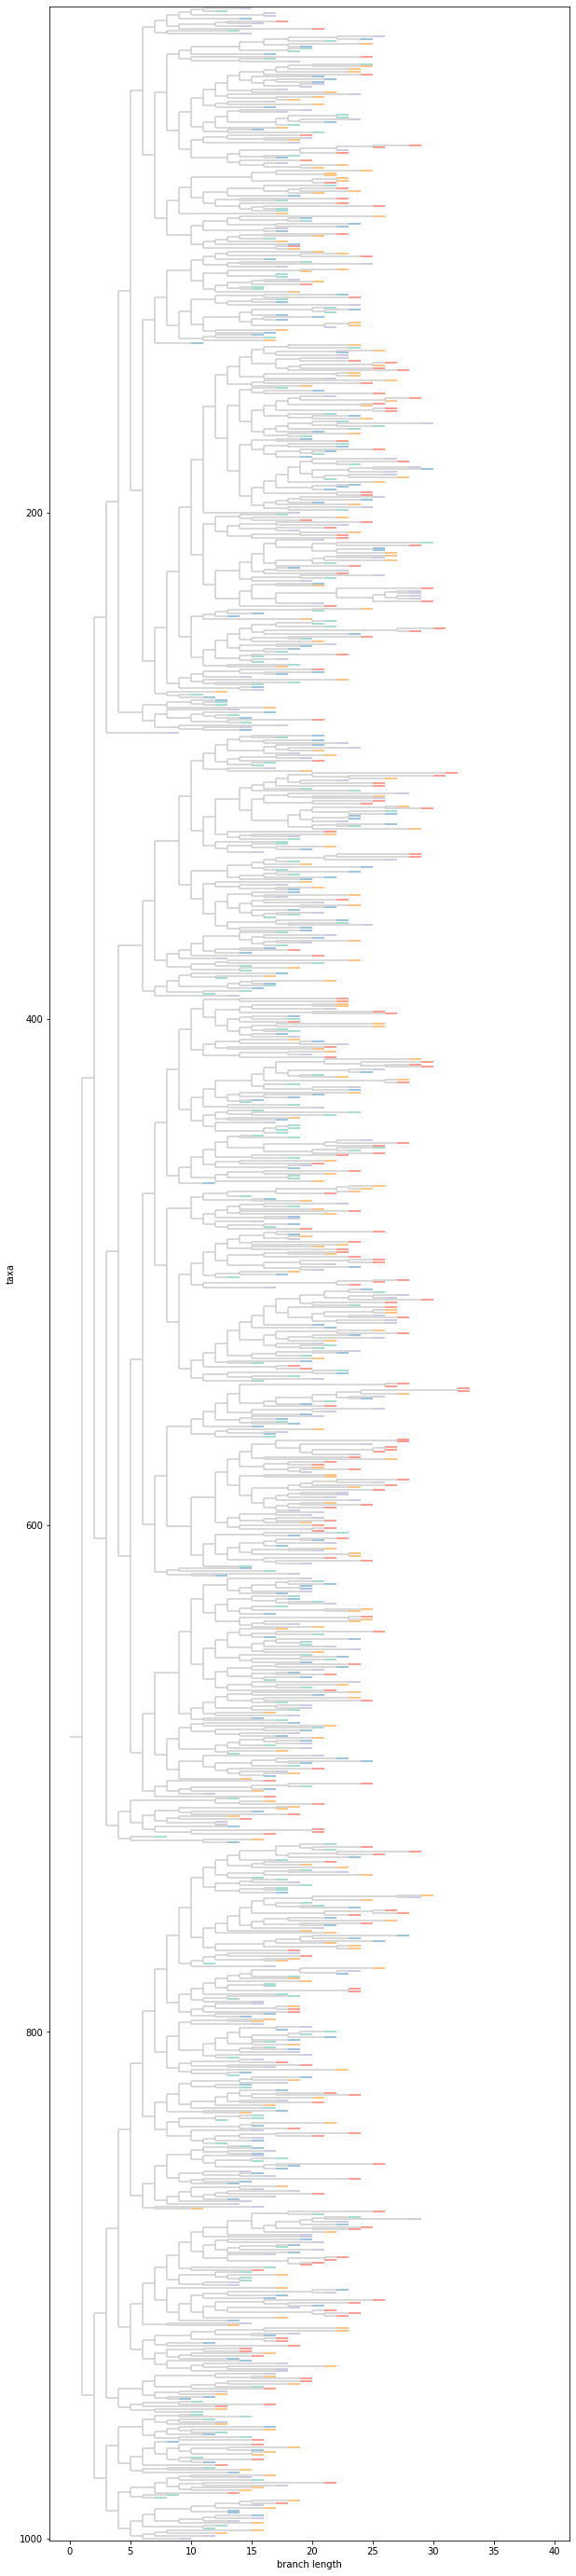

In [4]:
fig, ax = plt.subplots(figsize=(10,50))
ax = pv.ana_utils.plot_tree(tree, color, ax, stain="terminals", colortab=['#8dd3c7','#80b1d3','#bebada','#fdb462','#fb8072'])

## Simulate single cell base expression matrix

In [ ]:
sampled_cells = [i.name for i in tree.get_terminals()]
cell_names, cell_states, cell_generation = pv.sim_utils.get_annotation('./tree_origin_linear.csv0')
cell_states = pd.DataFrame(data=cell_states, index=cell_names).loc[sampled_cells]
ge, base_expr = pv.sim_utils.sim_base_expr(tree, 
                                           cell_states,
                                           Ngene=2000, 
                                           r_variant_gene=0.4, 
                                           diff_map={0:[0],1:[0],2:[1],3:[2],4:[3]},
                                           forward_map={},
                                           mu0_loc=0, 
                                           mu0_scale=1, 
                                           drift_loc=0, 
                                           drift_scale=0.3,
                                          )

## Add lineage noise and draw count from base expression

In [ ]:
count = pv.sim_utils.get_count_from_base_expr(pv.sim_utils.add_lineage_noise(tree, base_expr), alpha=0.1)

## tSNE embedding and visualization

In [ ]:
sd = pv.scData(count=count)
sd.normalize_filter()
sd.dimensionality_reduction()

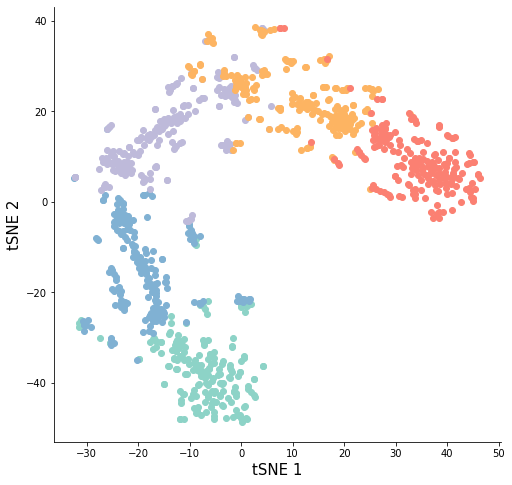

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
cmps = ['#8dd3c7','#80b1d3','#bebada','#fdb462','#fb8072']
for i in range(5):
    ax.scatter(sd.Xdr.iloc[sd.cell_states==i, 0], sd.Xdr.iloc[sd.cell_states==i, 1], c=cmps[i])
ax.set_xlabel('tSNE 1', fontsize=15)
ax.set_ylabel('tSNE 2', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)